In [98]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# Importing the required packages 
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from scipy.spatial import distance
from scipy.stats import kurtosis, skew,kurtosistest
from sklearn import preprocessing,metrics,neighbors
from sklearn import tree
from sklearn import tree, random_projection
from sklearn.cluster import KMeans
from sklearn.decomposition import FastICA, PCA
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
#from sklearn.mixture import GMM
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier 
import graphviz 
import keras
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import pandas as pd 
import pylab as pl
import random
import time

In [100]:
# Importing Dataset 
data=pd.read_csv("/content/drive/My Drive/ML_WorkSpace/Ass_3/Features_Variant_1.csv")
# Converting Facebook data target variable to classification lable
data['got_comments?'] = (data['Target Variable']>0).astype(int)
data = data.sample(n=5000, random_state=1).reset_index(drop=True)
# Dividing data frame to X & Y
X = data.iloc[:, :-2]
Y = data.iloc[:,54:]

# Feature Scaling
scaler = preprocessing.MinMaxScaler()#StandardScaler()
scaler.fit(X)  
X_trans = pd.DataFrame(scaler.transform(X))
X_trans.columns=X.columns

# Spliting Data to train and Test
X_train, X_test, y_train, y_test = train_test_split(  
    X_trans, Y, test_size = 0.3, random_state = 100)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


**K** **Means** **Clustering**

In [0]:
# Kmeans Function
def kmeans_fun(Train,min,max):
    ssd={}
    ss={}
    for k in range(min, max):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(Train)
        ssd[k] = kmeans.inertia_ 
        #ss[k] = silhouette_score(Train, kmeans.labels_, sample_size=20000, random_state=10)
        ss[k] = silhouette_score(Train, kmeans.labels_, random_state=10)
        
    plt.figure()
    plt.plot(list(ssd.keys()), list(ssd.values()),'bx-')
    plt.xlabel("Number of cluster")
    plt.ylabel("Sum of Square Distance")
    plt.title("Clusters vs SSD")
    plt.show()
    
    plt.figure()
    plt.plot(list(ss.keys()), list(ss.values()),'bx-')
    plt.xlabel("Number of cluster")
    plt.ylabel("avg silhouette_score")
    plt.title("Clusters vs avg silhouette_score")
    plt.show()
    return None

In [0]:

def plot_clusters(x1_kmeans,Y_1,split):
    
    plt.pie(np.unique(x1_kmeans,return_counts=True)[1], labels=np.unique(x1_kmeans,return_counts=True)[0], 
        autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('distribution of data in different clausters')
    plt.axis('equal')
    plt.show()
    
    ct_1=pd.DataFrame(pd.crosstab(x1_kmeans,Y_1.values.reshape(x1_kmeans.shape),normalize='index')*100)
    ct_1=ct_1.reset_index()
    ct_1.columns=['Cluster','0','1']
#     for l,r in ct_1.iterrows():
#       plt.pie([r[1],r[2]],labels=[0,1],autopct='%1.1f%%', shadow=True, startangle=0)
#       title = '% count of different categories across cluster:'+str(int(r[0]))
#       plt.title(title)
#       plt.axis('equal')
#       plt.show()
      
    p1 = plt.barh( ct_1['Cluster'], ct_1['0'],  label='0')
    p2 = plt.barh( ct_1['Cluster'], ct_1['1'], left=ct_1['0'],label='1')
#     plt.axhline(y=split, color='r', linestyle='-')
    plt.xlabel("Count")
    plt.ylabel("Clusters")
    plt.legend(loc='best')
    plt.title('Percentage count of different categories across clusters')
    plt.show()
      
      
      
      
      
    return None

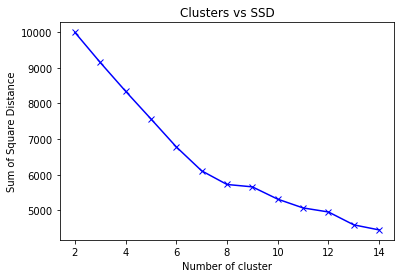

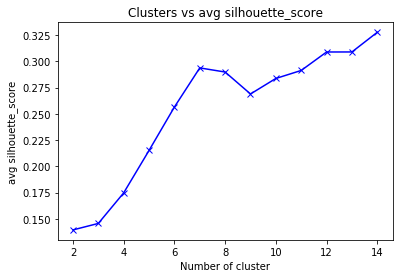

In [103]:
kmeans_fun(X_trans,2,15)

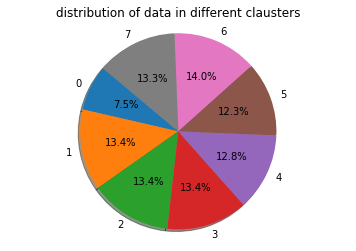

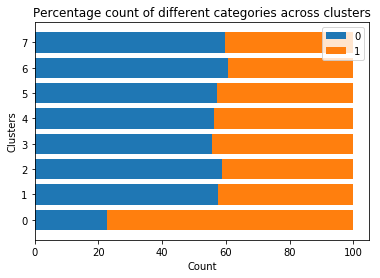

In [104]:
x1_kmeans = KMeans(n_clusters=8, random_state=0).fit_predict(X_trans)
plot_clusters(x1_kmeans,Y.astype(object),50)

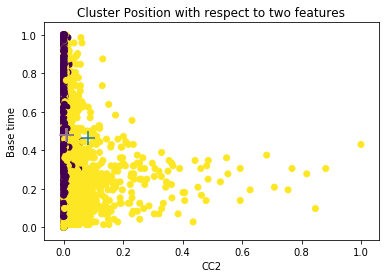

In [105]:

x=X_trans['CC2 '] #30
y=X_trans['Base time'] #34

X_trans.columns

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, c=Y['got_comments?'])
kmeans = KMeans(n_clusters=8, random_state=0).fit(X_trans)
centers = kmeans.cluster_centers_

ax.scatter(centers[0,[30]],centers[0,[34]],c='C0',marker='+',s=200)
ax.scatter(centers[1,[30]],centers[1,[34]],c='C1',marker='+',s=200)
ax.scatter(centers[2,[30]],centers[1,[34]],c='C2',marker='+',s=200)
ax.scatter(centers[3,[30]],centers[1,[34]],c='C3',marker='+',s=200)
ax.scatter(centers[4,[30]],centers[1,[34]],c='C4',marker='+',s=200)
ax.scatter(centers[5,[30]],centers[1,[34]],c='C5',marker='+',s=200)
ax.scatter(centers[6,[30]],centers[1,[34]],c='C6',marker='+',s=200)
ax.scatter(centers[7,[30]],centers[1,[34]],c='C7',marker='+',s=200)
ax.set_xlabel('CC2')
ax.set_ylabel('Base time')
ax.set_title('Cluster Position with respect to two features')
plt.show()

**Expectations Maximisation**

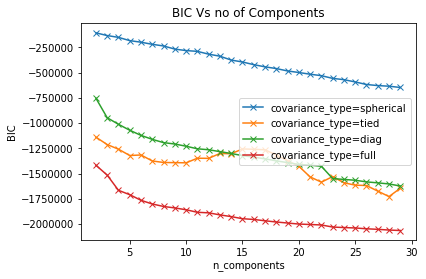

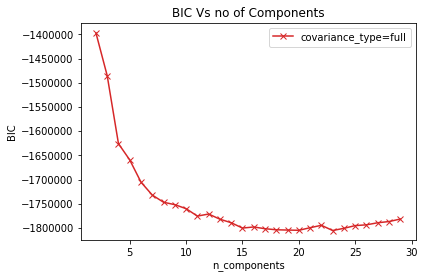

In [106]:
n_components = np.arange(2, 30)
models_spherical = [GaussianMixture(n, covariance_type='spherical', random_state=0).fit(X_trans)
          for n in n_components]
models_tied = [GaussianMixture(n, covariance_type='tied', random_state=0).fit(X_trans)
          for n in n_components]
models_diag = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X_trans)
          for n in n_components]
models_full = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_trans)
          for n in n_components]




plt.plot(n_components, [m.bic(X_trans) for m in models_spherical],'bx-',c='C0', label='covariance_type=spherical')
plt.plot(n_components, [m.aic(X_trans) for m in models_tied],'bx-',c='C1', label='covariance_type=tied')
plt.plot(n_components, [m.aic(X_trans) for m in models_diag],'bx-',c='C2', label='covariance_type=diag')
plt.plot(n_components, [m.aic(X_trans) for m in models_full],'bx-',c='C3', label='covariance_type=full')
# plt.plot(n_components, [m.aic(X_trans) for m in models],'bx-',c='C1', label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel('BIC')
plt.title('BIC Vs no of Components')
plt.show()

plt.plot(n_components, [m.bic(X_trans) for m in models_full],'bx-',c='C3', label='covariance_type=full')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel('BIC')
plt.title('BIC Vs no of Components')
plt.show()

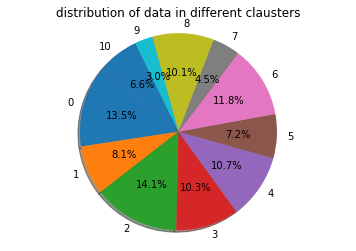

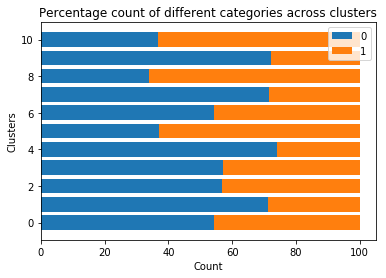

In [107]:
gmm = GaussianMixture(11, covariance_type='full', random_state=0).fit(X_trans)
x1_kmeans = gmm.predict(X_trans)
plot_clusters(x1_kmeans,Y,50)

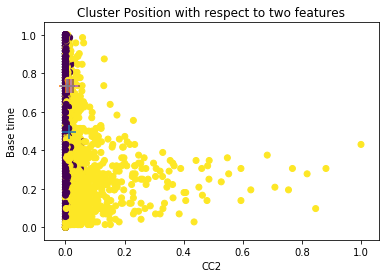

In [108]:

x=X_trans['CC2 '] #30
y=X_trans['Base time'] #34

X_trans.columns

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, c=Y['got_comments?'])
gmm = GaussianMixture(11, covariance_type='full', random_state=0).fit(X_trans)
x1_kmeans = gmm.predict(X_trans)
centers=gmm.means_

# kmeans = KMeans(n_clusters=8, random_state=0).fit(X_trans)
# centers = kmeans.cluster_centers_

ax.scatter(centers[0,[30]],centers[0,[34]],c='C0',marker='+',s=200)
ax.scatter(centers[1,[30]],centers[1,[34]],c='C1',marker='+',s=200)
ax.scatter(centers[2,[30]],centers[1,[34]],c='C2',marker='+',s=200)
ax.scatter(centers[3,[30]],centers[1,[34]],c='C3',marker='+',s=200)
ax.scatter(centers[4,[30]],centers[1,[34]],c='C4',marker='+',s=200)
ax.scatter(centers[5,[30]],centers[1,[34]],c='C5',marker='+',s=200)
ax.scatter(centers[6,[30]],centers[1,[34]],c='C6',marker='+',s=200)
ax.scatter(centers[7,[30]],centers[1,[34]],c='C7',marker='+',s=200)
ax.set_xlabel('CC2')
ax.set_ylabel('Base time')
ax.set_title('Cluster Position with respect to two features')
plt.show()

**Neural Net's on Cluster Results**

In [0]:
def NN_INT(n_hiddenlayer,n_node,Act_func,out_func,Opt_func,input_dim):
  
  classifier = Sequential()
  for i in range(n_hiddenlayer):
    if i == 0:      
      # Adding the input layer and the first hidden layer
      classifier.add(Dense(units = n_node, kernel_initializer = 'uniform', activation = Act_func, input_dim =input_dim ))
    else:
      # Adding the remaining hidden layer
      classifier.add(Dense(units = n_node, kernel_initializer = 'uniform', activation = Act_func))
  # Adding the output layer
  classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = out_func))
  # Compiling Neural Network
  classifier.compile(optimizer = Opt_func, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier

In [0]:
def NN_fit(classifier,X_train,y_train,bth_sz,no_epoch,X_test,y_test):
  start_time_iter = time.time()
  # CV Results
  kfold = StratifiedKFold(n_splits=3, shuffle=True)
  cvscores = []
  for train, test in kfold.split(X_train, y_train):
    # Fit the model
    classifier.fit(X_train[train], y_train[train], batch_size = bth_sz, epochs = no_epoch)
    # evaluate the model
    y_pred_cv = classifier.predict(X_train[test]) 
    y_pred_cv = (y_pred_cv > 0.5)
    cv_acc = accuracy_score(y_train[test],y_pred_cv)*100
    cvscores.append(cv_acc)
  cv_accuracy=np.mean(cvscores)  
  # Predicting the Train set results
  classifier.fit(X_train, y_train, batch_size = bth_sz, epochs = no_epoch)
  y_pred_train = classifier.predict(X_train) 
  y_pred_train = (y_pred_train > 0.5)
  train_accuracy = accuracy_score(y_train,y_pred_train)*100
  # Predicting the Test set results
  y_pred_test = classifier.predict(X_test)
  y_pred_test = (y_pred_test > 0.5)
  cm_test = confusion_matrix(y_test, y_pred_test)
  test_accuracy = accuracy_score(y_test,y_pred_test)*100    
  times=time.time()-start_time_iter 
  return classifier,y_pred_test,cm_test,test_accuracy,train_accuracy,cv_accuracy,times

In [111]:
# Spliting Data to train and Test
X_train, X_test, y_train, y_test = train_test_split(  
    X_trans.values, Y.values, test_size = 0.3, random_state = 100)
classifier=NN_INT(n_hiddenlayer=2,n_node=20,Act_func='relu',out_func='sigmoid',Opt_func='adam',input_dim=53)
classifier,y_pred_test,cm_test,test_accuracy,train_accuracy,cv_accuracy,times = NN_fit(classifier=classifier,X_train=X_train,y_train=y_train,bth_sz=10,no_epoch=10,X_test=X_test,y_test=y_test)


Epoch 1/10
2332/2332 [==============================] - 2s 678us/step - loss: 0.6276 - acc: 0.6677
Epoch 2/10
2332/2332 [==============================] - 1s 432us/step - loss: 0.5188 - acc: 0.7406
Epoch 3/10
2332/2332 [==============================] - 1s 441us/step - loss: 0.4793 - acc: 0.7804
Epoch 4/10
2332/2332 [==============================] - 1s 435us/step - loss: 0.4575 - acc: 0.7950
Epoch 5/10
2332/2332 [==============================] - 1s 443us/step - loss: 0.4501 - acc: 0.7882
Epoch 6/10
2332/2332 [==============================] - 1s 456us/step - loss: 0.4405 - acc: 0.8006
Epoch 7/10
2332/2332 [==============================] - 1s 438us/step - loss: 0.4368 - acc: 0.8040
Epoch 8/10
2332/2332 [==============================] - 1s 433us/step - loss: 0.4313 - acc: 0.8079
Epoch 9/10
2332/2332 [==============================] - 1s 454us/step - loss: 0.4276 - acc: 0.8019
Epoch 10/10
2332/2332 [==============================] - 1s 437us/step - loss: 0.4214 - acc: 0.8100
Epoch 1/1

**NN On Kmeans Clusters**

In [0]:
X_kmeans = KMeans(n_clusters=8, random_state=0).fit_predict(X_trans)
X_kmeans_Dummies=pd.get_dummies(X_kmeans,prefix=['cluster'])
# Spliting Data to train and Test
X_train_km, X_test_km, y_train_km, y_test_km = train_test_split(  
    X_kmeans_Dummies.values, Y.values, test_size = 0.3, random_state = 100)

In [113]:
classifier_km=NN_INT(n_hiddenlayer=2,n_node=20,Act_func='relu',out_func='sigmoid',Opt_func='adam',input_dim=8)
classifier_km,y_pred_test_km,cm_test_km,test_accuracy_km,train_accuracy_km,cv_accuracy_km,times_km = NN_fit(classifier=classifier_km,X_train=X_train_km,y_train=y_train_km,bth_sz=10,no_epoch=10,X_test=X_test_km,y_test=y_test_km)

Epoch 1/10
2332/2332 [==============================] - 2s 704us/step - loss: 0.6904 - acc: 0.5437
Epoch 2/10
2332/2332 [==============================] - 1s 440us/step - loss: 0.6796 - acc: 0.5905
Epoch 3/10
2332/2332 [==============================] - 1s 439us/step - loss: 0.6733 - acc: 0.5905
Epoch 4/10
2332/2332 [==============================] - 1s 438us/step - loss: 0.6698 - acc: 0.5866
Epoch 5/10
2332/2332 [==============================] - 1s 452us/step - loss: 0.6685 - acc: 0.5870
Epoch 6/10
2332/2332 [==============================] - 1s 445us/step - loss: 0.6685 - acc: 0.5853
Epoch 7/10
2332/2332 [==============================] - 1s 441us/step - loss: 0.6681 - acc: 0.5926
Epoch 8/10
2332/2332 [==============================] - 1s 440us/step - loss: 0.6682 - acc: 0.5905
Epoch 9/10
2332/2332 [==============================] - 1s 443us/step - loss: 0.6680 - acc: 0.5866
Epoch 10/10
2332/2332 [==============================] - 1s 448us/step - loss: 0.6679 - acc: 0.5918
Epoch 1/1

In [114]:
print('Full Data NN Cross-validation accuracy:',cv_accuracy)
print('K-Means Clustered Data NN Cross-validation:',cv_accuracy_km)

Full Data NN Cross-validation accuracy: 81.20075463865848
K-Means Clustered Data NN Cross-validation: 58.60051144685417


Text(0, 0.5, 'CV Classification Accuracy %')

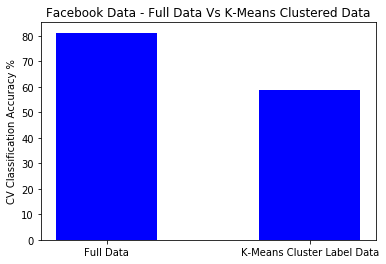

In [115]:
type_Data = ['Full Data','K-Means Cluster Label Data']
width = 1/2
plt.bar(type_Data,[cv_accuracy,cv_accuracy_km], width, color="blue")
plt.title("Facebook Data - Full Data Vs K-Means Clustered Data")
#plt.xlabel("Algorithm")
plt.ylabel("CV Classification Accuracy %")

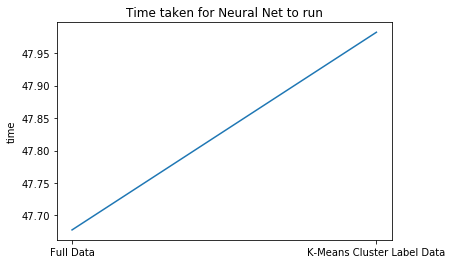

In [116]:
time1 = np.array([times,times_km])
plt.plot(time1)
plt.xticks([0,1], type_Data)
# plt.xlabel('dimension reduction techniques')
plt.ylabel('time')
plt.title('Time taken for Neural Net to run')
plt.show()

**NN on EM Clusters**

In [0]:
gmm = GaussianMixture(11, covariance_type='full', random_state=0).fit(X_trans)
gmm_2 = gmm.predict_proba(X_trans)
# Spliting Data to train and Test
X_train_gmm, X_test_gmm, y_train_gmm, y_test_gmm = train_test_split(  
    gmm_2, Y.values, test_size = 0.3, random_state = 100)

In [118]:
classifier_gmm=NN_INT(n_hiddenlayer=2,n_node=20,Act_func='relu',out_func='sigmoid',Opt_func='adam',input_dim=11)
classifier_gmm,y_pred_test_gmm,cm_test_gmm,test_accuracy_gmm,train_accuracy_gmm,cv_accuracy_gmm,times_gmm = NN_fit(classifier=classifier_gmm,X_train=X_train_gmm,y_train=y_train_gmm,bth_sz=10,no_epoch=10,X_test=X_test_gmm,y_test=y_test_gmm)

Epoch 1/10
2332/2332 [==============================] - 2s 721us/step - loss: 0.6880 - acc: 0.5519
Epoch 2/10
2332/2332 [==============================] - 1s 443us/step - loss: 0.6594 - acc: 0.6205
Epoch 3/10
2332/2332 [==============================] - 1s 448us/step - loss: 0.6529 - acc: 0.6166
Epoch 4/10
2332/2332 [==============================] - 1s 441us/step - loss: 0.6527 - acc: 0.6179
Epoch 5/10
2332/2332 [==============================] - 1s 437us/step - loss: 0.6520 - acc: 0.6205
Epoch 6/10
2332/2332 [==============================] - 1s 442us/step - loss: 0.6522 - acc: 0.6166
Epoch 7/10
2332/2332 [==============================] - 1s 444us/step - loss: 0.6515 - acc: 0.6205
Epoch 8/10
2332/2332 [==============================] - 1s 445us/step - loss: 0.6519 - acc: 0.6162
Epoch 9/10
2332/2332 [==============================] - 1s 445us/step - loss: 0.6518 - acc: 0.6205
Epoch 10/10
2332/2332 [==============================] - 1s 446us/step - loss: 0.6518 - acc: 0.6205
Epoch 1/1

In [119]:
print('Full Data NN Cross-validation accuracy:',cv_accuracy)
print('Expectation Maximisation Clustered Data NN Cross-validation accuracy:',cv_accuracy_gmm)

Full Data NN Cross-validation accuracy: 81.20075463865848
Expectation Maximisation Clustered Data NN Cross-validation accuracy: 62.31398372455493


Text(0, 0.5, 'CV Classification Accuracy %')

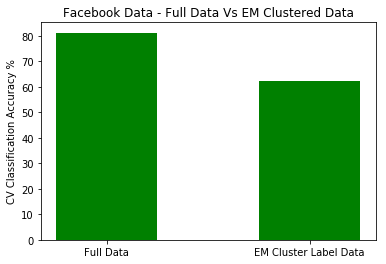

In [120]:
type_Data = ['Full Data','EM Cluster Label Data']
width = 1/2
plt.bar(type_Data,[cv_accuracy,cv_accuracy_gmm], width, color="green")
plt.title("Facebook Data - Full Data Vs EM Clustered Data")
#plt.xlabel("Algorithm")
plt.ylabel("CV Classification Accuracy %")

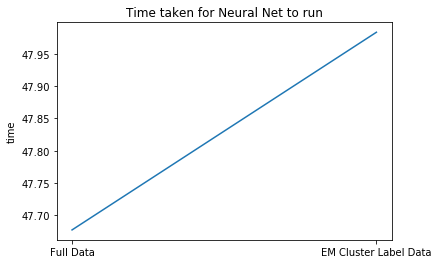

In [121]:
time1 = np.array([times,times_gmm])
plt.plot(time1)
plt.xticks([0,1], type_Data)
# plt.xlabel('dimension reduction techniques')
plt.ylabel('time')
plt.title('Time taken for Neural Net to run')
plt.show()

**Feature** **Selection**

**Decision Tree FS**

Number of features before transformation: (5000, 53)
Number of features after transformation: (5000, 9)
columns retained: Index(['Page Popularity/likes ', 'Derived 13', 'Derived 23', 'CC2 ', 'CC4',
       'CC5', 'Base time', 'Post length', 'Post Share Count'],
      dtype='object')


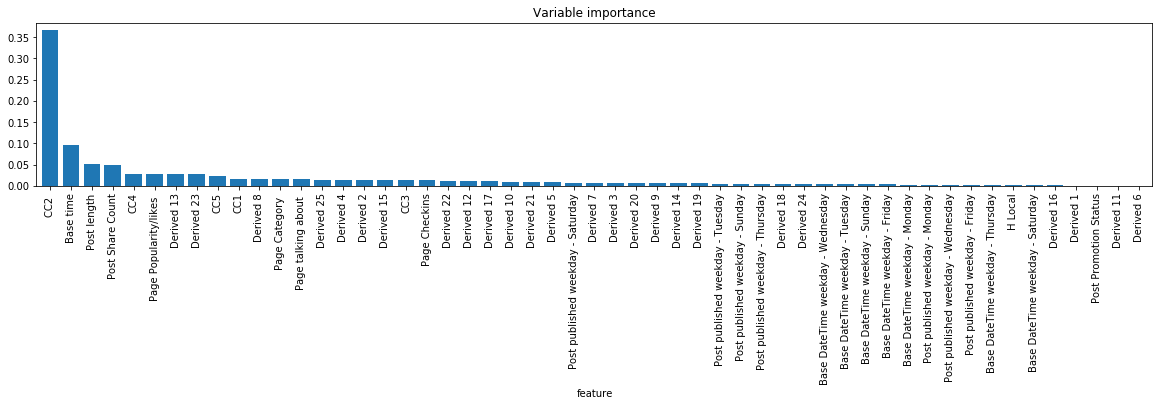

In [122]:
Y_1_copy=Y.astype('int')
dt = tree.DecisionTreeClassifier(random_state=0,criterion="entropy")
dt.fit(X_trans,Y_1_copy)
print("Number of features before transformation:",X_trans.shape)
dt.feature_importances_  
model = SelectFromModel(dt, prefit=True)
X_trans_dt = model.transform(X_trans)
print("Number of features after transformation:",X_trans_dt.shape )
print("columns retained:",X_trans.columns[model.get_support()])
dt_1_features=pd.concat([pd.DataFrame(X_trans.columns),pd.DataFrame(dt.feature_importances_)],axis=1)
dt_1_features.columns=['feature','imp']
dt_1_features.sort_values(by=['imp'],ascending=False,inplace=True)
dt_1_features.set_index('feature',inplace=True)
plt.figure(figsize=(20, 3))
dt_1_features['imp'].plot.bar(width=0.8)
plt.title('Variable importance')
plt.show()

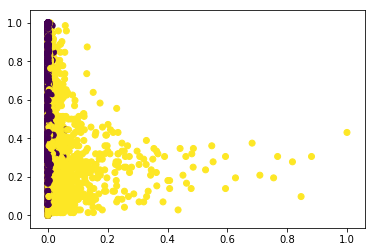

In [123]:
plt.scatter(X_trans['CC2 '],X_trans['Base time'],c=Y['got_comments?'])

**PCA FS**

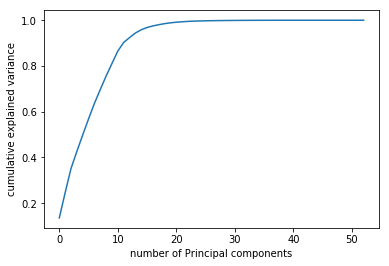

Number of features with no reduction: (5000, 53)
Number of features after PCA: (5000, 12)



In [124]:
pca = PCA().fit(X_trans)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of Principal components')
plt.ylabel('cumulative explained variance')
plt.show()
pca = PCA(0.90).fit(X_trans)
X_trans_pca=pca.transform(X_trans)
print("Number of features with no reduction:", X_trans.shape)

print("Number of features after PCA:", X_trans_pca.shape)
print("")
pca_loadings=pca.components_.T * np.sqrt(pca.explained_variance_)
# for i in range(1,7):
#     print("PC",i,"is loaded on high on feature:",X_trans.columns[max(abs(pca_loadings[:,i]))==abs(pca_loadings[:,i])][0])

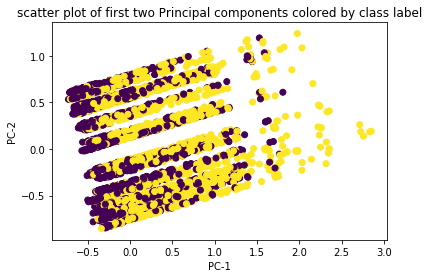

In [125]:
x=X_trans_pca[:,0]
y=X_trans_pca[:,1]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, c=Y['got_comments?'])
ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
plt.title('scatter plot of first two Principal components colored by class label')
plt.show()

**ICA**

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


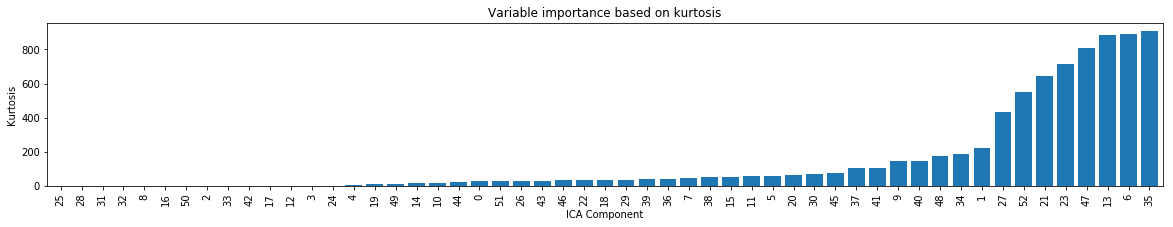

Number of features after reduction (5000, 41)


In [126]:
ica = FastICA(random_state=0)
X_trans_ica = ica.fit_transform(X_trans)  # Reconstruct signals
kk_1=[]
index=[]
for i in range(0, X_trans_ica.shape[1]):
    kk_1.append(abs(kurtosis(X_trans_ica[:,i], fisher=True)))
    index.append(i)
kk_1_pd=pd.DataFrame(kk_1,index)
kk_1_pd.reset_index(inplace=True)
kk_1_pd.columns=['index','kurtosis']
kk_1_pd=kk_1_pd.sort_values(['kurtosis'],ascending=[1])
plt.figure(figsize=(20, 3))
kk_1_pd['kurtosis'].plot.bar(width=0.8)
plt.xlabel('ICA Component')
plt.ylabel('Kurtosis')
plt.title('Variable importance based on kurtosis')
plt.show()
X_trans_ica=X_trans_ica[:,kk_1_pd[kk_1_pd['kurtosis']>=2]['index']]
print("Number of features after reduction",X_trans_ica.shape)

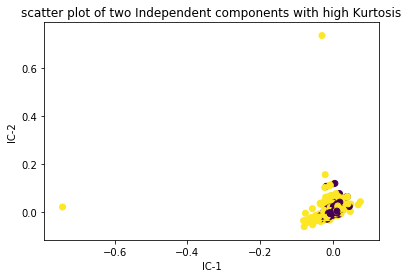

In [147]:
x=X_trans_ica[:,-1]
y=X_trans_ica[:,-2]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, c=Y['got_comments?'])
ax.set_xlabel('IC-1')
ax.set_ylabel('IC-2')
plt.title('scatter plot of two Independent components with high Kurtosis')
plt.show()

**RCA**

In [0]:
def custom1(data, orig_dimension, new_dimension):
    minusOne = 0.1
    one = 0.9
    rows = len(data)
    m = np.empty((orig_dimension, new_dimension))
    # build random matrix
    for i in range(len(m)):
        for j in range(len(m[i])):
            rand = random.random()
            if rand < minusOne:
                m[i][j] = -1
            elif rand >= one:
                m[i][j] = 1
            else:
                m[i][j] = 0
    reduced = np.mat(data) * m
    #reduced=""
    return reduced,m

In [156]:
X_trans_ra,m=custom1(X_trans, X_trans.shape[1], int(X_trans.shape[1]/2))

print("Number of components after reduction:",X_trans_ra.shape)

Number of components after reduction: (5000, 26)


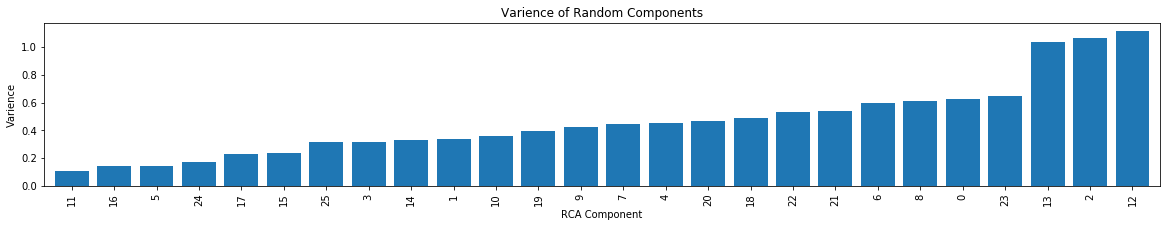

In [157]:
Var_1=[]
for i in range(0, X_trans_ra.shape[1]):
    Var_1.append(np.var(X_trans_ra[:,i]))
    index.append(i)
Var_1_pd=pd.DataFrame(Var_1)
Var_1_pd.reset_index(inplace=True)
Var_1_pd.columns=['index','Varience']
Var_1_pd=Var_1_pd.sort_values(['Varience'],ascending=[1])
plt.figure(figsize=(20, 3))
Var_1_pd['Varience'].plot.bar(width=0.8)
plt.xlabel('RCA Component')
plt.ylabel('Varience')
plt.title('Varience of Random Components')
plt.show()

In [0]:
X_trans_dt=pd.DataFrame(X_trans_dt)
X_trans_pca=pd.DataFrame(X_trans_pca)
X_trans_ica=pd.DataFrame(X_trans_ica)
X_trans_ra=pd.DataFrame(X_trans_ra)

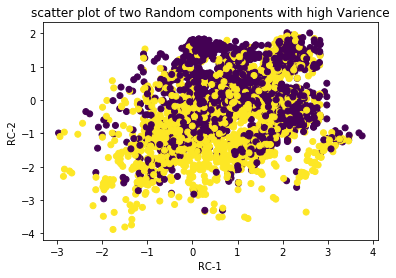

In [170]:
x=X_trans_ra.iloc[:,12]
y=X_trans_ra.iloc[:,2]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, c=Y['got_comments?'])
ax.set_xlabel('RC-1')
ax.set_ylabel('RC-2')
plt.title('scatter plot of two Random components with high Varience')
plt.show()

**NN on DR**

In [0]:
# Spliting Data to train and Test
X_train, X_test, y_train, y_test = train_test_split(  
    X_trans.values, Y.values, test_size = 0.3, random_state = 100)

# Spliting Data to train and Test DT
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(  
    X_trans_dt.values, Y.values, test_size = 0.3, random_state = 100)
# Spliting Data to train and Test PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(  
    X_trans_pca.values, Y.values, test_size = 0.3, random_state = 100)
# Spliting Data to train and Test ICA
X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(  
    X_trans_ica.values, Y.values, test_size = 0.3, random_state = 100)
# Spliting Data to train and Test RCA
X_train_ra, X_test_ra, y_train_ra, y_test_ra = train_test_split(  
    X_trans_ra.values, Y.values, test_size = 0.3, random_state = 100)

In [64]:
classifier=NN_INT(n_hiddenlayer=2,n_node=20,Act_func='relu',out_func='sigmoid',Opt_func='adam',input_dim=53)
classifier,y_pred_test,cm_test,test_accuracy,train_accuracy,cv_accuracy,times = NN_fit(classifier=classifier,X_train=X_train,y_train=y_train,bth_sz=10,no_epoch=10,X_test=X_test,y_test=y_test)

classifier_dt=NN_INT(n_hiddenlayer=2,n_node=20,Act_func='relu',out_func='sigmoid',Opt_func='adam',input_dim=9)
classifier_dt,y_pred_test_dt,cm_test_dt,test_accuracy_dt,train_accuracy_dt,cv_accuracy_dt,times_dt = NN_fit(classifier=classifier_dt,X_train=X_train_dt,y_train=y_train_dt,bth_sz=10,no_epoch=10,X_test=X_test_dt,y_test=y_test_dt)

classifier_pca=NN_INT(n_hiddenlayer=2,n_node=20,Act_func='relu',out_func='sigmoid',Opt_func='adam',input_dim=12)
classifier_pca,y_pred_test_pca,cm_test_pca,test_accuracy_pca,train_accuracy_pca,cv_accuracy_pca,times_pca = NN_fit(classifier=classifier_pca,X_train=X_train_pca,y_train=y_train_pca,bth_sz=10,no_epoch=10,X_test=X_test_pca,y_test=y_test_pca)

classifier_ica=NN_INT(n_hiddenlayer=2,n_node=20,Act_func='relu',out_func='sigmoid',Opt_func='adam',input_dim=41)
classifier_ica,y_pred_test_ica,cm_test_ica,test_accuracy_ica,train_accuracy_ica,cv_accuracy_ica,times_ica = NN_fit(classifier=classifier_ica,X_train=X_train_ica,y_train=y_train_ica,bth_sz=10,no_epoch=10,X_test=X_test_ica,y_test=y_test_ica)

classifier_ra=NN_INT(n_hiddenlayer=2,n_node=20,Act_func='relu',out_func='sigmoid',Opt_func='adam',input_dim=26)
classifier_ra,y_pred_test_ra,cm_test_ra,test_accuracy_ra,train_accuracy_ra,cv_accuracy_ra,times_ra = NN_fit(classifier=classifier_ra,X_train=X_train_ra,y_train=y_train_ra,bth_sz=10,no_epoch=10,X_test=X_test_ra,y_test=y_test_ra)


Epoch 1/10
2332/2332 [==============================] - 2s 646us/step - loss: 0.6310 - acc: 0.6544
Epoch 2/10
2332/2332 [==============================] - 1s 439us/step - loss: 0.5196 - acc: 0.7414
Epoch 3/10
2332/2332 [==============================] - 1s 454us/step - loss: 0.4789 - acc: 0.7749
Epoch 4/10
2332/2332 [==============================] - 1s 449us/step - loss: 0.4612 - acc: 0.7847
Epoch 5/10
2332/2332 [==============================] - 1s 455us/step - loss: 0.4520 - acc: 0.7873
Epoch 6/10
2332/2332 [==============================] - 1s 449us/step - loss: 0.4468 - acc: 0.7890
Epoch 7/10
2332/2332 [==============================] - 1s 449us/step - loss: 0.4453 - acc: 0.7920
Epoch 8/10
2332/2332 [==============================] - 1s 450us/step - loss: 0.4365 - acc: 0.7959
Epoch 9/10
2332/2332 [==============================] - 1s 459us/step - loss: 0.4333 - acc: 0.7955
Epoch 10/10
2332/2332 [==============================] - 1s 454us/step - loss: 0.4251 - acc: 0.8032
Epoch 1/1

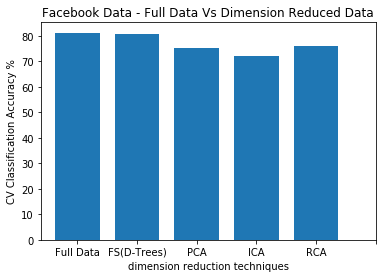

In [65]:
dim = np.array(["Full Data","FS(D-Trees)","PCA","ICA","RCA"])
cv_acc_1 = np.array([cv_accuracy,cv_accuracy_dt,cv_accuracy_pca,cv_accuracy_ica,cv_accuracy_ra])

width = 0.75/1
plt.bar(dim,cv_acc_1, width, color="C0")


# plt.plot(cv_acc_1)
plt.xticks([0,1, 2, 3,4,5], dim)
plt.xlabel('dimension reduction techniques')
plt.ylabel('CV Classification Accuracy %')
plt.title('Facebook Data - Full Data Vs Dimension Reduced Data')
plt.show()

In [68]:
print('CV Accuracy are:','\n',dim,'\n',cv_acc_1)

CV Accuracy are: 
 ['Full Data' 'FS(D-Trees)' 'PCA' 'ICA' 'RCA'] 
 [81.25734275 80.88516334 75.25733883 72.11518128 76.20122457]


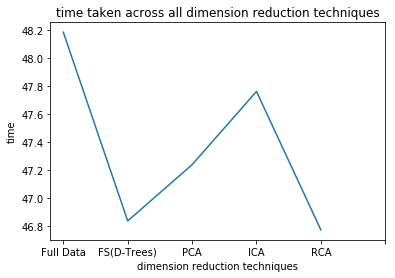

In [69]:
dim = np.array(["Full Data","FS(D-Trees)","PCA","ICA","RCA"])
time1 = np.array([times,times_dt,times_pca,times_ica,times_ra])
plt.plot(time1)
plt.xticks([0,1, 2, 3,4,5], dim)
plt.xlabel('dimension reduction techniques')
plt.ylabel('time')
plt.title('time taken across all dimension reduction techniques')
plt.show()

**Clustering on DT Dimension Reduction**

***K-Means***

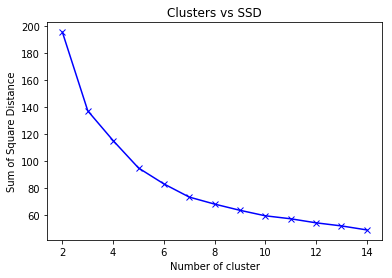

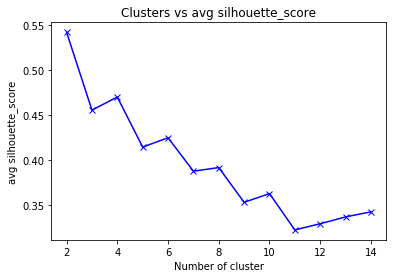

In [171]:
kmeans_fun(X_trans_dt,2,15)

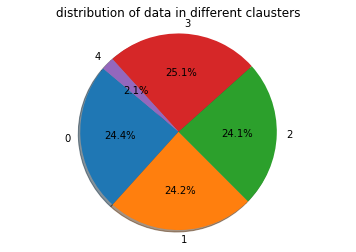

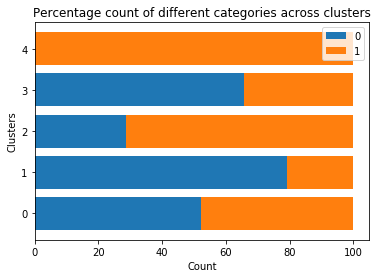

In [172]:
x1_kmeans = KMeans(n_clusters=5, random_state=0).fit_predict(X_trans_dt)
plot_clusters(x1_kmeans,Y.astype(object),50)

**Expectations Maximisation**

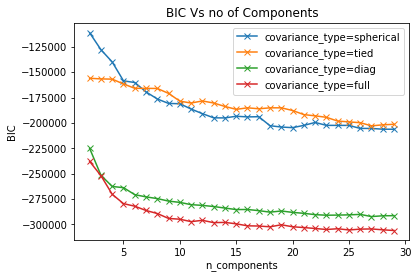

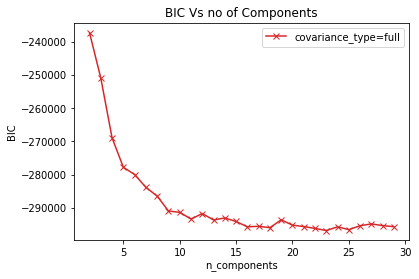

In [173]:
n_components = np.arange(2, 30)
models_spherical = [GaussianMixture(n, covariance_type='spherical', random_state=0).fit(X_trans_dt)
          for n in n_components]
models_tied = [GaussianMixture(n, covariance_type='tied', random_state=0).fit(X_trans_dt)
          for n in n_components]
models_diag = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X_trans_dt)
          for n in n_components]
models_full = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_trans_dt)
          for n in n_components]




plt.plot(n_components, [m.bic(X_trans_dt) for m in models_spherical],'bx-',c='C0', label='covariance_type=spherical')
plt.plot(n_components, [m.aic(X_trans_dt) for m in models_tied],'bx-',c='C1', label='covariance_type=tied')
plt.plot(n_components, [m.aic(X_trans_dt) for m in models_diag],'bx-',c='C2', label='covariance_type=diag')
plt.plot(n_components, [m.aic(X_trans_dt) for m in models_full],'bx-',c='C3', label='covariance_type=full')
# plt.plot(n_components, [m.aic(X_trans_dt) for m in models],'bx-',c='C1', label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel('BIC')
plt.title('BIC Vs no of Components')
plt.show()

plt.plot(n_components, [m.bic(X_trans_dt) for m in models_full],'bx-',c='C3', label='covariance_type=full')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel('BIC')
plt.title('BIC Vs no of Components')
plt.show()

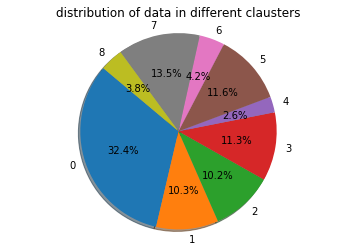

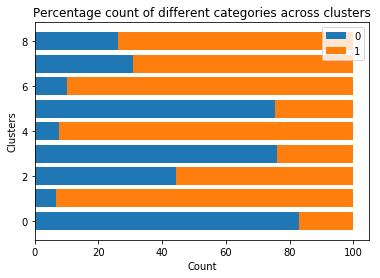

In [175]:
gmm = GaussianMixture(9, covariance_type='full', random_state=0).fit(X_trans_dt)
x1_kmeans = gmm.predict(X_trans_dt)
plot_clusters(x1_kmeans,Y,50)

**Clustering on PCA Dimension Reduction**

***K-Means***

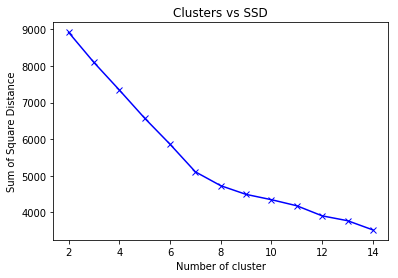

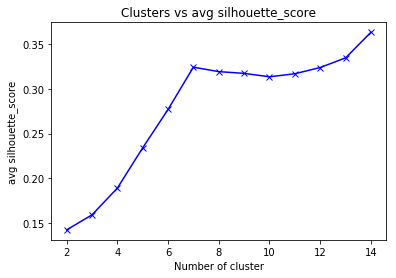

In [176]:
kmeans_fun(X_trans_pca,2,15)

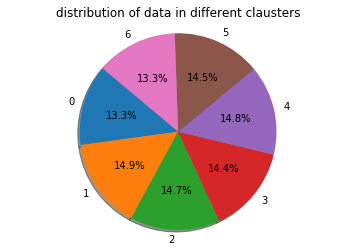

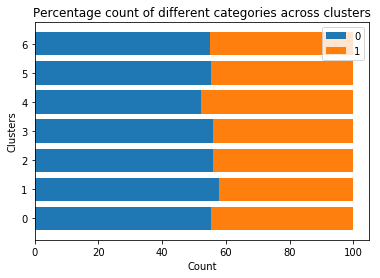

In [177]:
x1_kmeans = KMeans(n_clusters=7, random_state=0).fit_predict(X_trans_pca)
plot_clusters(x1_kmeans,Y.astype(object),50)

**Expectations Maximisation**

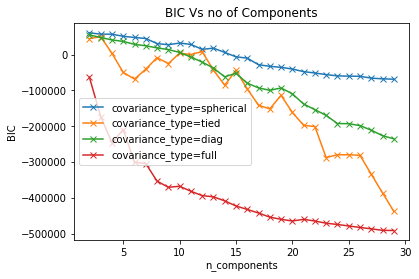

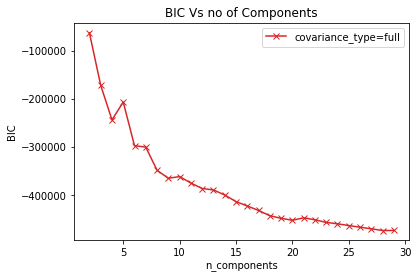

In [178]:
n_components = np.arange(2, 30)
models_spherical = [GaussianMixture(n, covariance_type='spherical', random_state=0).fit(X_trans_pca)
          for n in n_components]
models_tied = [GaussianMixture(n, covariance_type='tied', random_state=0).fit(X_trans_pca)
          for n in n_components]
models_diag = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X_trans_pca)
          for n in n_components]
models_full = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_trans_pca)
          for n in n_components]




plt.plot(n_components, [m.bic(X_trans_pca) for m in models_spherical],'bx-',c='C0', label='covariance_type=spherical')
plt.plot(n_components, [m.aic(X_trans_pca) for m in models_tied],'bx-',c='C1', label='covariance_type=tied')
plt.plot(n_components, [m.aic(X_trans_pca) for m in models_diag],'bx-',c='C2', label='covariance_type=diag')
plt.plot(n_components, [m.aic(X_trans_pca) for m in models_full],'bx-',c='C3', label='covariance_type=full')
# plt.plot(n_components, [m.aic(X_trans_pca) for m in models],'bx-',c='C1', label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel('BIC')
plt.title('BIC Vs no of Components')
plt.show()

plt.plot(n_components, [m.bic(X_trans_pca) for m in models_full],'bx-',c='C3', label='covariance_type=full')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel('BIC')
plt.title('BIC Vs no of Components')
plt.show()

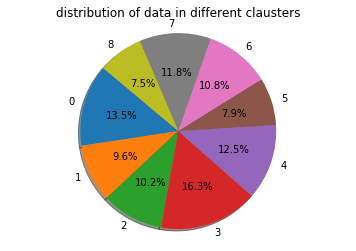

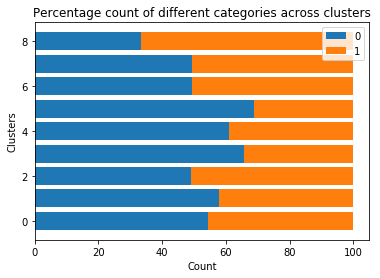

In [179]:
gmm = GaussianMixture(9, covariance_type='full', random_state=0).fit(X_trans_pca)
x1_kmeans = gmm.predict(X_trans_pca)
plot_clusters(x1_kmeans,Y,50)

**Clustering on ICA Dimension Reduction**

***K-Means***

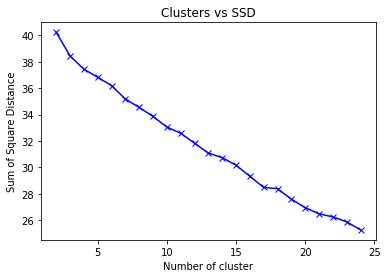

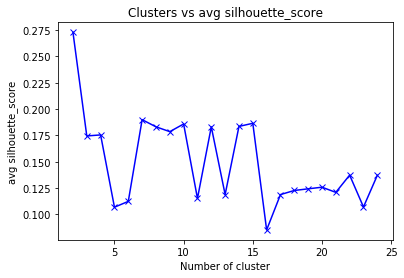

In [183]:
kmeans_fun(X_trans_ica,2,25)

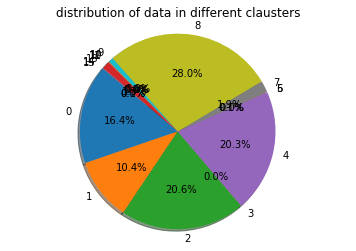

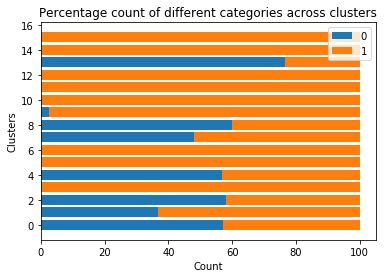

In [184]:
x1_kmeans = KMeans(n_clusters=16, random_state=0).fit_predict(X_trans_ica)
plot_clusters(x1_kmeans,Y.astype(object),50)

**Expectations Maximisation**

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


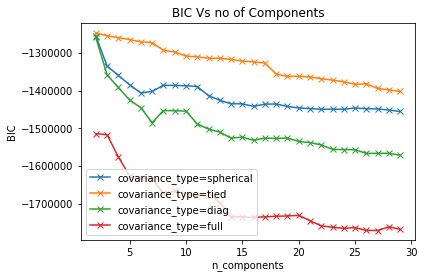

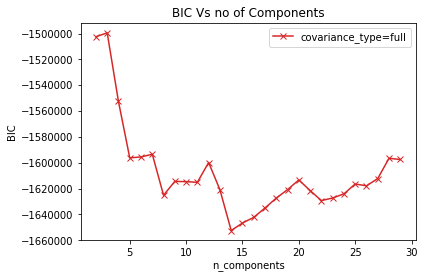

In [185]:
n_components = np.arange(2, 30)
models_spherical = [GaussianMixture(n, covariance_type='spherical', random_state=0).fit(X_trans_ica)
          for n in n_components]
models_tied = [GaussianMixture(n, covariance_type='tied', random_state=0).fit(X_trans_ica)
          for n in n_components]
models_diag = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X_trans_ica)
          for n in n_components]
models_full = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_trans_ica)
          for n in n_components]




plt.plot(n_components, [m.bic(X_trans_ica) for m in models_spherical],'bx-',c='C0', label='covariance_type=spherical')
plt.plot(n_components, [m.aic(X_trans_ica) for m in models_tied],'bx-',c='C1', label='covariance_type=tied')
plt.plot(n_components, [m.aic(X_trans_ica) for m in models_diag],'bx-',c='C2', label='covariance_type=diag')
plt.plot(n_components, [m.aic(X_trans_ica) for m in models_full],'bx-',c='C3', label='covariance_type=full')
# plt.plot(n_components, [m.aic(X_trans_ica) for m in models],'bx-',c='C1', label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel('BIC')
plt.title('BIC Vs no of Components')
plt.show()

plt.plot(n_components, [m.bic(X_trans_ica) for m in models_full],'bx-',c='C3', label='covariance_type=full')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel('BIC')
plt.title('BIC Vs no of Components')
plt.show()

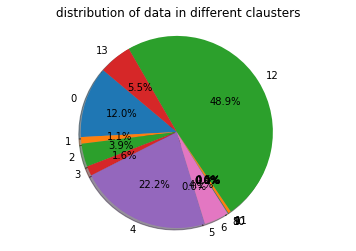

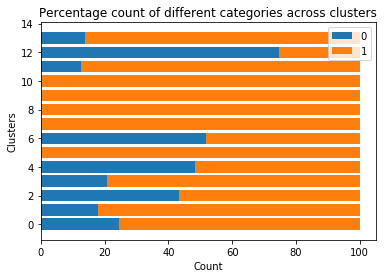

In [186]:
gmm = GaussianMixture(14, covariance_type='full', random_state=0).fit(X_trans_ica)
x1_kmeans = gmm.predict(X_trans_ica)
plot_clusters(x1_kmeans,Y,50)

**Clustering on RCA Dimension Reduction**

***K-Means***

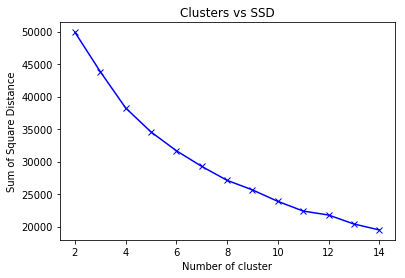

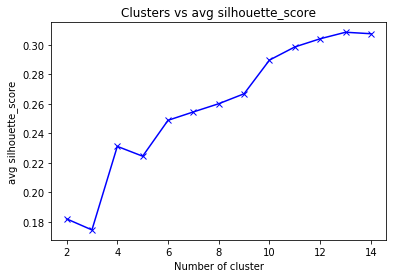

In [188]:
kmeans_fun(X_trans_ra,2,15)

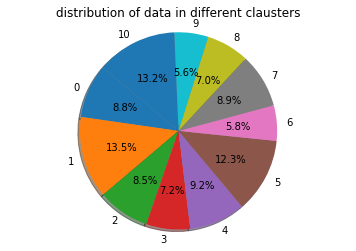

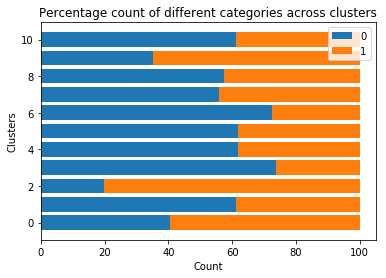

In [189]:
x1_kmeans = KMeans(n_clusters=11, random_state=0).fit_predict(X_trans_ra)
plot_clusters(x1_kmeans,Y.astype(object),50)

**Expectations Maximisation**

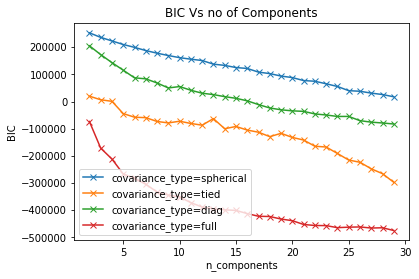

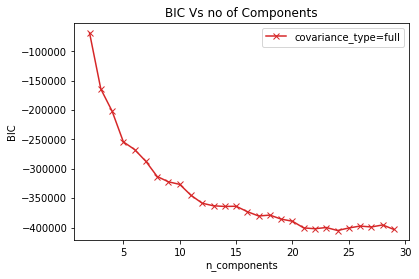

In [190]:
n_components = np.arange(2, 30)
models_spherical = [GaussianMixture(n, covariance_type='spherical', random_state=0).fit(X_trans_ra)
          for n in n_components]
models_tied = [GaussianMixture(n, covariance_type='tied', random_state=0).fit(X_trans_ra)
          for n in n_components]
models_diag = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(X_trans_ra)
          for n in n_components]
models_full = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_trans_ra)
          for n in n_components]




plt.plot(n_components, [m.bic(X_trans_ra) for m in models_spherical],'bx-',c='C0', label='covariance_type=spherical')
plt.plot(n_components, [m.aic(X_trans_ra) for m in models_tied],'bx-',c='C1', label='covariance_type=tied')
plt.plot(n_components, [m.aic(X_trans_ra) for m in models_diag],'bx-',c='C2', label='covariance_type=diag')
plt.plot(n_components, [m.aic(X_trans_ra) for m in models_full],'bx-',c='C3', label='covariance_type=full')
# plt.plot(n_components, [m.aic(X_trans_ra) for m in models],'bx-',c='C1', label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel('BIC')
plt.title('BIC Vs no of Components')
plt.show()

plt.plot(n_components, [m.bic(X_trans_ra) for m in models_full],'bx-',c='C3', label='covariance_type=full')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel('BIC')
plt.title('BIC Vs no of Components')
plt.show()

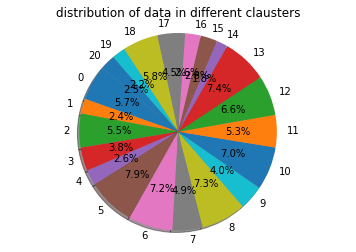

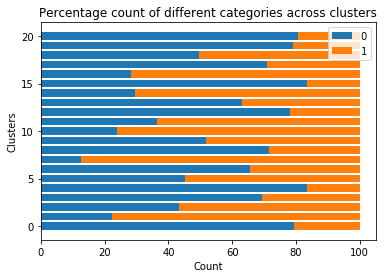

In [191]:
gmm = GaussianMixture(21, covariance_type='full', random_state=0).fit(X_trans_ra)
x1_kmeans = gmm.predict(X_trans_ra)
plot_clusters(x1_kmeans,Y,50)